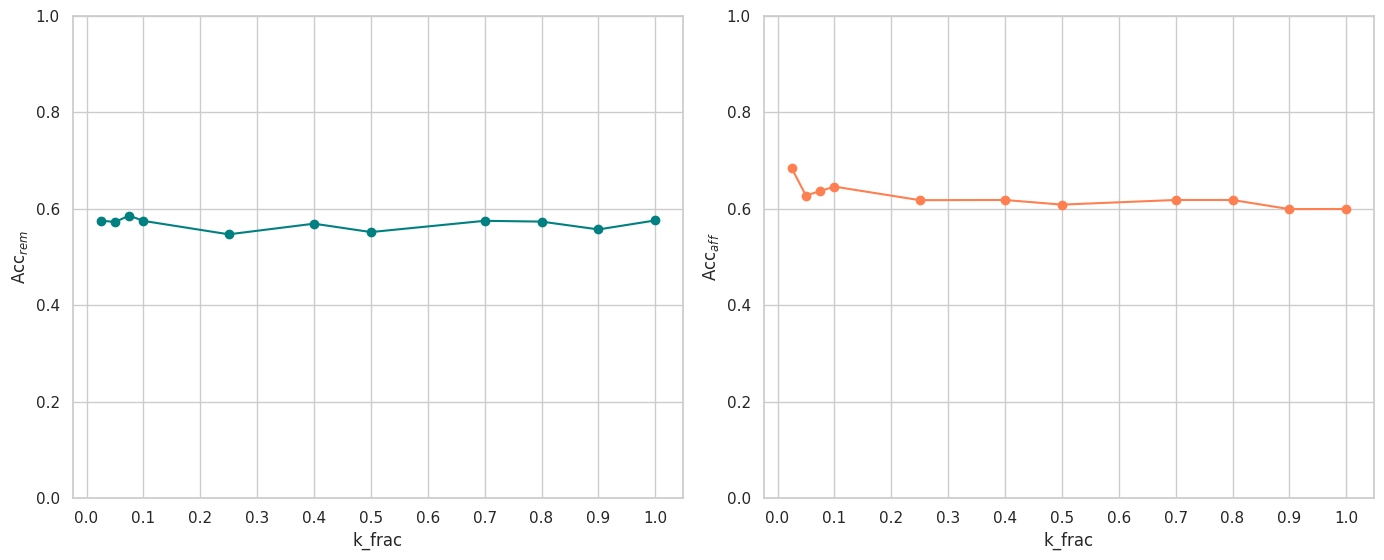

In [4]:
# %%
import matplotlib.pyplot as plt
import seaborn as sns
import json
import ast
import numpy as np
from collections import defaultdict

# Load and parse the data from file
with open("./report2.txt", "r") as f:
    text = f.read().split("\n")

# Convert text lines to dictionaries
dict_arr = [ast.literal_eval(strv) for strv in text if strv]

# Aggregate data by `k_frac` to calculate mean and standard deviation
aggregated_data = defaultdict(lambda: {"Forg_Accuracy": [], "Util_Accuracy": []})

# Populate the aggregated data
for entry in dict_arr:
    k_frac = entry["k_frac"]
    aggregated_data[k_frac]["Forg_Accuracy"].append(entry["Forg_Accuracy"])
    aggregated_data[k_frac]["Util_Accuracy"].append(entry["Util_Accuracy"])

# Calculate means and standard deviations
k_fracs = sorted(aggregated_data.keys())
forg_means = [np.max(aggregated_data[k]["Forg_Accuracy"]) for k in k_fracs]
# forg_stds = [np.std(aggregated_data[k]["Forg_Accuracy"]) for k in k_fracs]
util_means = [np.max(aggregated_data[k]["Util_Accuracy"]) for k in k_fracs]
# util_stds = [np.std(aggregated_data[k]["Util_Accuracy"]) for k in k_fracs]

# %%
# Plotting
sns.set(style="whitegrid")  # Set Seaborn style for a clean background
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Util Accuracy plot
ax[0].errorbar(k_fracs, util_means, fmt='-o', capsize=5, color='teal', label="Util Accuracy")
# ax[0].set_title("Util Accuracy")
ax[0].set_xlabel("k_frac")
ax[0].set_ylabel("Acc$_{rem}$")
ax[0].set_ylim(0, 1)  # Set y-axis between 0 and 1
ax[0].set_xticks(np.arange(0, 1.1, 0.1))

# Forg Accuracy plot
ax[1].errorbar(k_fracs, forg_means, fmt='-o', capsize=5, color='coral', label="Forg Accuracy")
# ax[1].set_title("Forg Accuracy")
ax[1].set_xlabel("k_frac")
ax[1].set_ylabel("Acc$_{aff}$")
ax[1].set_ylim(0, 1)  # Set y-axis between 0 and 1
ax[1].set_xticks(np.arange(0, 1.1, 0.1))

# plt.suptitle("Variation of Accuracy Metrics", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import json
import ast
import numpy as np
from collections import defaultdict

# Load and parse the data from file
with open("./report.txt", "r") as f:
    text = f.read().split("\n")
dict_arr = [ast.literal_eval(strv) for strv in text if strv]

/tmp/ipykernel_93715/3224589740.py:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


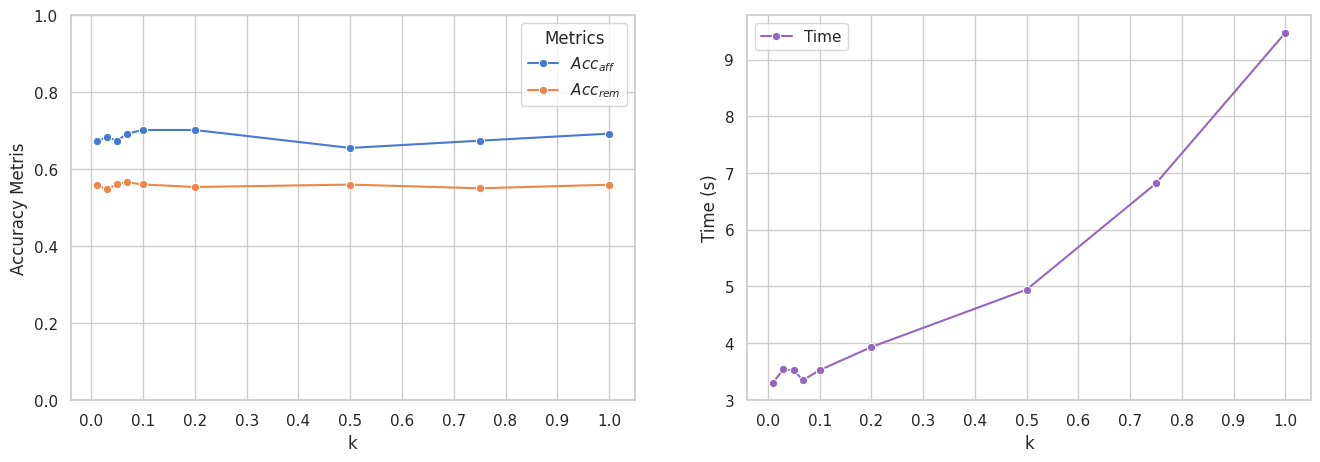

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data for demonstration
# Replace these with actual values
forg = [dictv["Forg_Accuracy"] for dictv in dict_arr]
util = [dictv["Util_Accuracy"] for dictv in dict_arr]
time = [dictv["time"] for dictv in dict_arr]
k_frac = [dictv["k_frac"] for dictv in dict_arr]

# Set Seaborn style for aesthetics
sns.set(style="whitegrid", palette="muted")

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 5), sharex=True, gridspec_kw={'hspace': 0.4})

# First subplot: `forg` and `util` vs. `k_frac`
sns.lineplot(x=k_frac, y=forg, label='$Acc_{aff}$', ax=axes[0], marker='o')
sns.lineplot(x=k_frac, y=util, label='$Acc_{rem}$', ax=axes[0], marker='o')
axes[0].set_ylabel("Accuracy Metris")
axes[0].legend(title="Metrics")
axes[0].set_xlabel("k")
axes[0].set_ylim(0, 1)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

# Second subplot: `time` vs. `k_frac`
sns.lineplot(x=k_frac, y=time, label='Time', ax=axes[1], color="tab:purple", marker='o')
axes[1].set_xlabel("k")
axes[1].set_ylabel("Time (s)")
# Show the plot
plt.tight_layout()
plt.show()
